# Timing Distributions of HNLs at SBN/DUNE

In [1]:
from hnl_flux import *
from hnl_decays import *
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm, ticker
from matplotlib.pylab import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [9]:
def get_timing_distribution(mN, mZp, Ualpha=1.0, flavor=1):

    flux = FluxHNLFromProtonBrem(proton_energy=120000.0, mixing_flavor=flavor,
                                mixing_angle=1.0, hnl_mass=mN, coupling_BL=1e-4,
                                zprime_mass=mZp, n_samples=100000)
    
    flux.simulate()
    flux.decay_to_hnl()
    flux.propagate(Ualpha)

    return flux.hnl_timing, DUNE_EFFICIENCY * DUNE_POT_TOTAL * flux.decay_axion_weight
        

In [22]:
test_mN = 200.0  # MeV
test_mZp = 3*test_mN
test_Ualpha = 1e-4


timing, weights = get_timing_distribution(test_mN, test_mZp, test_Ualpha, flavor=2)

4913


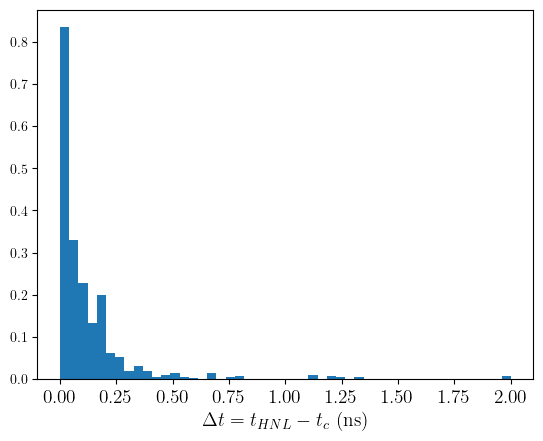

In [31]:
tof_light = (DUNE_DIST / (1e-2 * C_LIGHT))

timing_bins = np.logspace(-3, 3, 100)*1e-9
timing_bins = np.linspace(0.0, 2.0, 50)

print(timing.shape[0])

plt.hist(1e9*(timing - tof_light), weights=weights, bins=timing_bins)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r"$\Delta t = t_{HNL} - t_c$ (ns)", fontsize=14)
plt.xticks(fontsize=14)
plt.show()

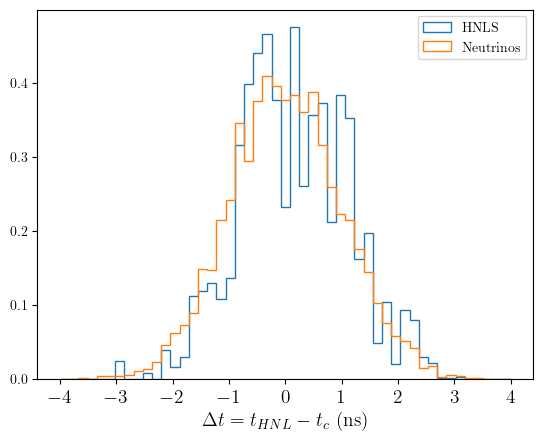

In [59]:
from scipy.stats import norm

beam_spill_times = norm.rvs(loc=0.0, scale=1.0, size=timing.shape[0])  # nanoseconds

timing_with_spill = 1e-9*beam_spill_times + timing
nu_timing = 1e-9*beam_spill_times + tof_light

timing_bins = np.linspace(-4, 4, 50)


plt.hist(1e9*(timing_with_spill - tof_light), weights=weights,
         bins=timing_bins, histtype='step', label="HNLS", density=True)
plt.hist(1e9*(nu_timing - tof_light), bins=timing_bins, histtype='step', density=True, label="Neutrinos")
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r"$\Delta t = t_{HNL} - t_c$ (ns)", fontsize=14)
plt.legend()
plt.xticks(fontsize=14)
plt.show()

In [46]:
from sbn_constants import *
def get_timing_distribution_sbnd(mN, mZp, Ualpha=1.0, flavor=1):

    flux = FluxHNLFromProtonBrem(proton_energy=8000.0, mixing_flavor=flavor,
                                mixing_angle=1.0, hnl_mass=mN, coupling_BL=1e-4,
                                zprime_mass=mZp, det_dist=SBND_DIST, det_length=SBND_LENGTH,
                                det_area=SBND_AREA, target=Material("Be"), n_samples=100000)
    
    flux.simulate()
    flux.decay_to_hnl()
    flux.propagate(Ualpha)

    return flux.hnl_timing, DUNE_EFFICIENCY * DUNE_POT_TOTAL * flux.decay_axion_weight
        

In [54]:
test_mN = 200.0  # MeV
test_mZp = 2.1*test_mN
test_Ualpha = 1e-4
tof_light_sbn = (SBND_DIST / (1e-2 * C_LIGHT))


timing_sbn, weights_sbn = get_timing_distribution_sbnd(test_mN, test_mZp, test_Ualpha, flavor=2)



/home/thompson/Dropbox/coding/pyALPs/HNL/hnl_flux.py:394: RuntimeWarning: invalid value encountered in sqrt
  zp_p = sqrt(zp_energy**2 - self.ma**2)
/home/thompson/Dropbox/coding/pyALPs/HNL/hnl_flux.py:397: RuntimeWarning: invalid value encountered in arcsin
  theta = arcsin(sinTheta)
/home/thompson/Dropbox/coding/pyALPs/HNL/zprime_decay_widths.py:22: RuntimeWarning: invalid value encountered in sqrt
  return np.nan_to_num((gBL**2 * mZp / 12 / pi) * sqrt(1 - 4*power(ml/mZp, 2)) * (1 + 2*power(ml/mZp, 2)))
/home/thompson/Dropbox/coding/pyALPs/HNL/hnl_flux.py:417: RuntimeWarning: invalid value encountered in sqrt
  pzp = sqrt(self.axion_energy[i]**2 - self.ma**2)
/home/thompson/Dropbox/coding/pyALPs/HNL/hnl_decays.py:155: RuntimeWarning: invalid value encountered in sqrt
  * sqrt((1-power((M_PI - ml)/mN, 2))*(1-power((M_PI + ml)/mN, 2))))
/home/thompson/Dropbox/coding/pyALPs/HNL/hnl_decays.py:169: RuntimeWarning: invalid value encountered in sqrt
  kallen = sqrt(kallen_alplib(1.0, xP**2,

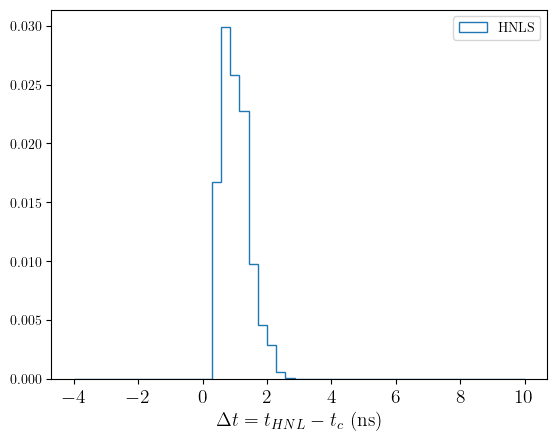

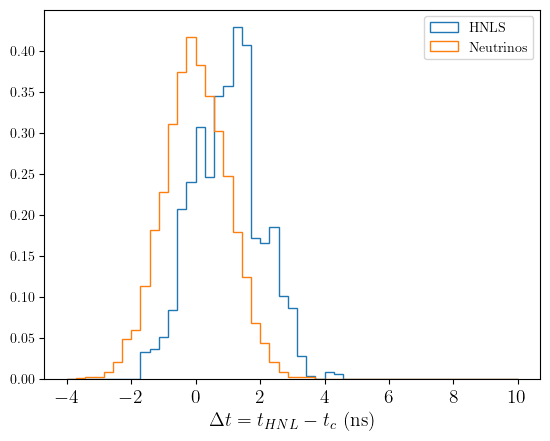

In [58]:
beam_spill_times = norm.rvs(loc=0.0, scale=1.0, size=timing_sbn.shape[0])  # nanoseconds

timing_with_spill = 1e-9*beam_spill_times + timing_sbn
nu_timing = 1e-9*beam_spill_times + tof_light_sbn

timing_bins = np.linspace(-4, 10, 50)


plt.hist(1e9*(timing_sbn - tof_light_sbn), weights=weights_sbn,
         bins=timing_bins, histtype='step', label="HNLS")
#plt.hist(1e9*(nu_timing - tof_light_sbn), bins=timing_bins, histtype='step', density=True, label="Neutrinos")
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r"$\Delta t = t_{HNL} - t_c$ (ns)", fontsize=14)
plt.legend()
plt.xticks(fontsize=14)
plt.show()


plt.hist(1e9*(timing_with_spill - tof_light_sbn), weights=weights_sbn,
         bins=timing_bins, histtype='step', label="HNLS", density=True)
plt.hist(1e9*(nu_timing-tof_light_sbn), bins=timing_bins, histtype='step', density=True, label="Neutrinos")
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r"$\Delta t = t_{HNL} - t_c$ (ns)", fontsize=14)
plt.legend()
plt.xticks(fontsize=14)
plt.show()